## patent-exploratory-data-analysis-6G_alloys

### Data Dictionary

df_patents (dataframe)

titles -- patent titles

dates -- issue date of patents

num_inventors -- number or inventors

num_pc -- number of patent citations

num_npc -- number of non-patent citations

num_rb -- number of references by other patents

num_class -- number of patent classifications

num_le -- number of legal events

cum_rbs -- cumulative references (sum of num_rbs)

yearly_sales 

### Create plots for date and time plots. 

In [1]:
import numpy as np
import pandas as pd

df_patents = pd.read_csv('/Users/stevehansen/Desktop/output_alloy_data_total.csv')
print (df_patents)

       Unnamed: 0 patent_no                                       url  \
0               0   9637179  https://www.google.com/patents/US9637179   
1               1   9636784  https://www.google.com/patents/US9636784   
2               2   9634324  https://www.google.com/patents/US9634324   
3               3   9634123  https://www.google.com/patents/US9634123   
4               4   9631879  https://www.google.com/patents/US9631879   
5               5   9631878  https://www.google.com/patents/US9631878   
6               6   9631268  https://www.google.com/patents/US9631268   
7               7   9631261  https://www.google.com/patents/US9631261   
8               8   9631260  https://www.google.com/patents/US9631260   
9               9   9631157  https://www.google.com/patents/US9631157   
10             10   9630834  https://www.google.com/patents/US9630834   
11             11   9630251  https://www.google.com/patents/US9630251   
12             12   9630161  https://www.google.com

In [2]:
df_patents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10137 entries, 0 to 10136
Data columns (total 13 columns):
Unnamed: 0      10137 non-null int64
patent_no       10137 non-null object
url             10137 non-null object
title           10137 non-null object
issue_date      10137 non-null object
date            10137 non-null object
num_patent      10137 non-null int64
num_inventor    10137 non-null int64
num_pc          10137 non-null int64
num_npc         10137 non-null int64
num_rb          10137 non-null int64
num_class       10137 non-null int64
num_le          10137 non-null int64
dtypes: int64(8), object(5)
memory usage: 1.0+ MB


In [3]:
df_patents = df_patents.drop(['Unnamed: 0'], axis=1)
df_patents = df_patents.drop(['num_patent'], axis=1)
#print (df_patents) 

### Reverse the order of the dataframe.  See:  http://www.marsja.se/six-ways-to-reverse-pandas-dataframe/

In [4]:
df_patents = df_patents.iloc[::-1]

In [5]:
print (df_patents)

      patent_no                                       url  \
10136   3930575  https://www.google.com/patents/US3930575   
10135   3930848  https://www.google.com/patents/US3930848   
10134   3930895  https://www.google.com/patents/US3930895   
10133   3930899  https://www.google.com/patents/US3930899   
10132   3930904  https://www.google.com/patents/US3930904   
10131   3930962  https://www.google.com/patents/US3930962   
10130   3930964  https://www.google.com/patents/US3930964   
10129   3930965  https://www.google.com/patents/US3930965   
10128   3930966  https://www.google.com/patents/US3930966   
10127   3933473  https://www.google.com/patents/US3933473   
10126   3933481  https://www.google.com/patents/US3933481   
10125   3933483  https://www.google.com/patents/US3933483   
10124   3933484  https://www.google.com/patents/US3933484   
10123   3933531  https://www.google.com/patents/US3933531   
10122   3933961  https://www.google.com/patents/US3933961   
10121   3935007  https:/

### Renumber the index to go from 0 to 10136.

In [6]:
# Renumber the index so that the plots are numbered correctly. 

df_patents = df_patents.reset_index()
del df_patents['index']

print (df_patents)       # Looks okay.

      patent_no                                       url  \
0       3930575  https://www.google.com/patents/US3930575   
1       3930848  https://www.google.com/patents/US3930848   
2       3930895  https://www.google.com/patents/US3930895   
3       3930899  https://www.google.com/patents/US3930899   
4       3930904  https://www.google.com/patents/US3930904   
5       3930962  https://www.google.com/patents/US3930962   
6       3930964  https://www.google.com/patents/US3930964   
7       3930965  https://www.google.com/patents/US3930965   
8       3930966  https://www.google.com/patents/US3930966   
9       3933473  https://www.google.com/patents/US3933473   
10      3933481  https://www.google.com/patents/US3933481   
11      3933483  https://www.google.com/patents/US3933483   
12      3933484  https://www.google.com/patents/US3933484   
13      3933531  https://www.google.com/patents/US3933531   
14      3933961  https://www.google.com/patents/US3933961   
15      3935007  https:/

### Save as df_patents.

In [7]:
df_patents.describe()

,num_inventor,num_pc,num_npc,num_rb,num_class,num_le
count,10137.000000,10137.000000,10137.000000,10137.000000,10137.000000,10137.000000
mean,2.919108,12.997139,3.212785,15.647036,16.174213,4.176186
std,1.818188,24.138194,8.621308,41.604616,10.058189,2.722414
min,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.000000,5.000000,0.000000,2.000000,9.000000,2.000000
50%,3.000000,8.000000,0.000000,7.000000,14.000000,4.000000
75%,4.000000,15.000000,3.000000,18.000000,20.000000,6.000000
max,18.000000,981.000000,218.000000,2341.000000,116.000000,22.000000


In [8]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### Prepare to plot various quantities. 

In [9]:
# Number of patent citations, num_pc. 

num_pcs = []

value  = (df_patents['num_pc'])
num_pcs.append(value)
#print value    

for row in df_patents.iterrows():      
    df_patents['num_pc'] = value 

    
# Number of forward citations, num_rb.
num_rbs = []

value  = (df_patents['num_rb'])
num_rbs.append(value)
#print value    

for row in df_patents.iterrows():      
    df_patents['num_rb'] = value 

    
# Number of inventors, num_inventor.
num_inventors = []

value  = (df_patents['num_inventor'])
num_inventors.append(value)
#print value    

for row in df_patents.iterrows():      
    df_patents['num_inventor'] = value 

    
# Number of non-patent citations, num_npc.
num_npcs = []

value  = (df_patents['num_npc'])
num_npcs.append(value)
#print value    

for row in df_patents.iterrows():      
    df_patents['num_npc'] = value 

    
# Number of legal events, num_le.
num_les = []

value  = (df_patents['num_le'])
num_les.append(value)
#print value    

for row in df_patents.iterrows():      
    df_patents['num_le'] = value 

    
# Number of classifications, num_class
num_classes = []

value  = (df_patents['num_class'])
num_classes.append(value)
#print value    

for row in df_patents.iterrows():      
    df_patents['num_class'] = value 

## Plot No. of Forward Citations vs. other variables. 

### Plot 1) - No. of forward citations vs. No. of (back) patent citations.   ( num_rb   vs.   num_pc)

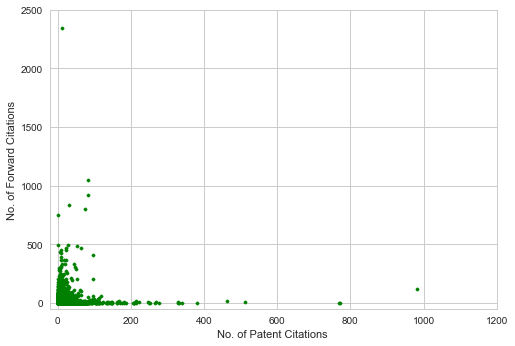

In [10]:
# No. of forward patent citations vs. No. of back patent references. 

plt.scatter(num_pcs, num_rbs, marker = 'o', color = 'green', s = 11 )
plt.xlabel("No. of Patent Citations ")
plt.ylabel("No. of Forward Citations")
plt.style.use('seaborn-white')
ax = plt.axes()
ax.set(xlim=(-20,1200), ylim = (-50,2500))
plt.show()

### Plot 2) - No. of forward citations vs. No. of (back) non-patent citations.  (num_rb vs. num_npc)

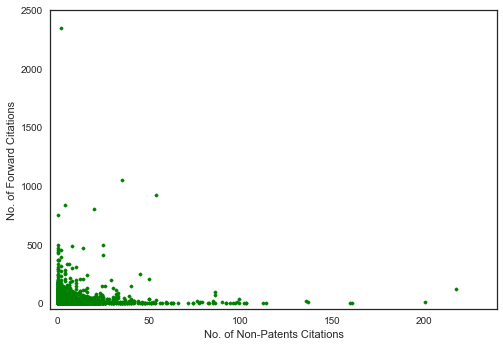

In [11]:
# Number of forward citations vs. number of (back) non-patent citations. 

plt.scatter(num_npcs, num_rbs,  marker = 'o', color = 'green', s = 11)
plt.xlabel("No. of Non-Patents Citations")
plt.ylabel("No. of Forward Citations")

plt.style.use('seaborn-white')
ax = plt.axes()
ax.set(xlim=(-4,240), ylim = (-50,2500))

plt.show()


### Plot 3) - No. of forward citations vs. No. of inventors.  (num_rb vs. num_inventor)  

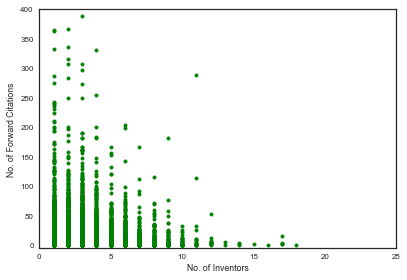

In [81]:
# Number of inventors vs. number of forward citations. 

plt.scatter(num_inventors, num_rbs,  marker = 'o', color = 'green', s = 13 )
plt.xlabel("No. of Inventors")
plt.ylabel("No. of Forward Citations")

plt.style.use('seaborn-white')
ax = plt.axes()
ax.set(xlim=(0,25), ylim = (-5,400))

plt.show()

### Plot 4) - No. of forward citations vs. No. of patent classifications. 

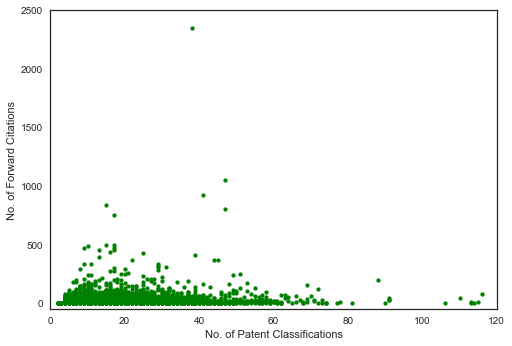

In [13]:
# Plot the number forward references vs. number of classifications. 

plt.scatter(num_classes, num_rbs,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Patent Classifications")
plt.ylabel("No. of Forward Citations")

plt.style.use('seaborn-white')
ax = plt.axes()
ax.set(xlim=(0,120), ylim = (-50,2500))

plt.show()

### Plot 5) - No. of forward citations vs. No. of legal events. 

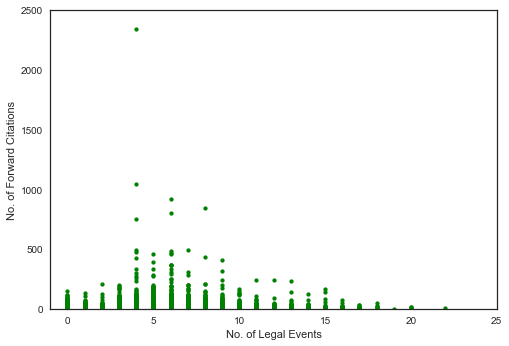

In [14]:
# Plot the number of forward citations vs. number of legal events.  

plt.scatter(num_les, num_rbs,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Legal Events")
plt.ylabel("No. of Forward Citations")

plt.style.use('seaborn-white')
ax = plt.axes()
ax.set(xlim=(-1,25), ylim = (0,2500))

plt.show()

##   Plot No. of (back) Patent Citations vs. other variables. 

### Plot 6) - No. of patent citations vs. No. of Non-patent citations.  (num_pc vs. num_npc)

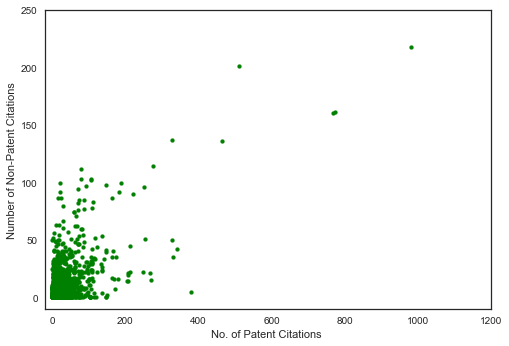

In [15]:
# Plot the number of Patent Citation versus Non-Patent Citations. 

plt.scatter(num_pcs, num_npcs,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Patent Citations ")
plt.ylabel("Number of Non-Patent Citations")

plt.style.use('seaborn-white')
ax = plt.axes()
ax.set(xlim=(-20,1200), ylim = (-10,250))

plt.show()

### Plot 7) - No. of (back) patent citations vs. No. of legal events. (num_pc vs. num_le)

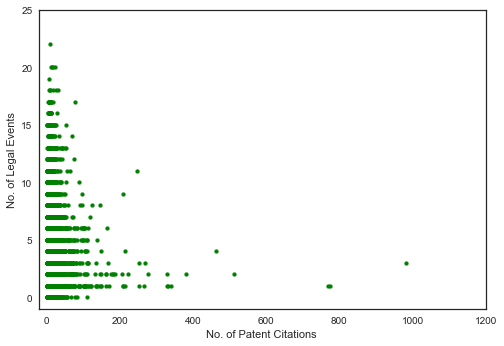

In [16]:
# Plot the No. of legal events vs. No. of (back) patent citations.

plt.scatter(num_pcs, num_les,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Patent Citations ")
plt.ylabel("No. of Legal Events")

plt.style.use('seaborn-white')
ax = plt.axes()
ax.set(xlim=(-20,1200), ylim = (-1,25))

plt.show()

### Plot 8) - No. of inventors vs. No. of patent citations. (num_inventors vs. num_pc)

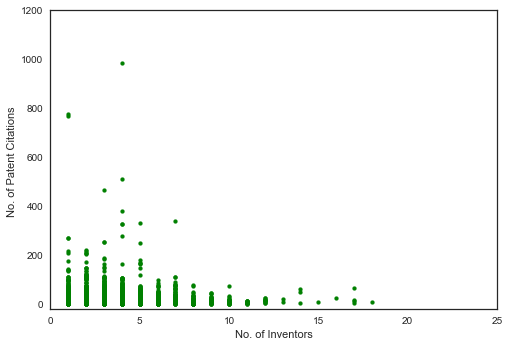

In [17]:
# Plot the No. of inventors vs. No. of (back) patent citations.

plt.scatter(num_inventors, num_pcs, marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Inventors")
plt.ylabel("No. of Patent Citations ")

plt.style.use('seaborn-white')
ax = plt.axes()
ax.set(xlim=(0,25), ylim = (-20,1200))

plt.show()

### Plot 9) - No. of patent classifications vs. No. of patent citations. (num_classes vs. num_pc)

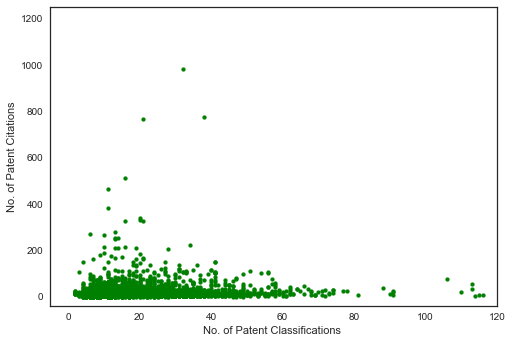

In [18]:
# Plot the No. of patent classifications vs. No. of (back) patent citations.

plt.scatter(num_classes, num_pcs,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Patent Classifications ")
plt.ylabel("No. of Patent Citations")

plt.style.use('seaborn-white')
ax = plt.axes()
ax.set(xlim=(-5,120), ylim = (-40,1250))

plt.show()

## Plot No. of (back) Non-Patent Citations vs. other variables.

### Plot 10)-  No. of patent classifications vs. No. of Non-Patent Citations. (num_class vs. num_npc)

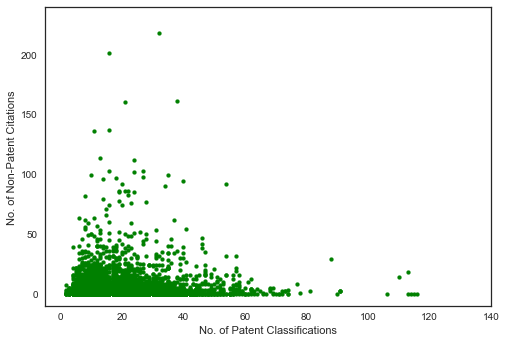

In [19]:
# Plot the No. of patent classifications vs. No. of (back) patent citations.

plt.scatter(num_classes, num_npcs, marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Patent Classifications")
plt.ylabel("No. of Non-Patent Citations ")

plt.style.use('seaborn-white')
ax = plt.axes()
ax.set(xlim=(-5,140), ylim = (-10,240))

plt.show()

##  Plots using Non-Patent Citations vs. other variables. 

### Plot the number of Non-patent citations vs. number of legal events.  (num_npcs vs. num_le)

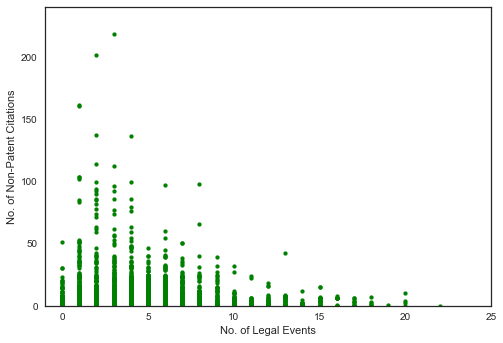

In [20]:
# Plot the number of non-patent citations vs. number of legal events.  

plt.scatter(num_les, num_npcs,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Legal Events")
plt.ylabel("No. of Non-Patent Citations")

plt.style.use('seaborn-white')
ax = plt.axes()
ax.set(xlim=(-1,25), ylim = (0,240))

plt.show()

### Plot the number of non-patent citations vs. number of inventors. 

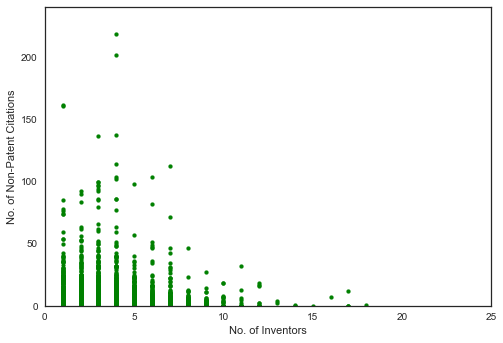

In [21]:
# Plot the number of non-patent citations vs. number of inventors. 

plt.scatter(num_inventors, num_npcs,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Inventors")
plt.ylabel("No. of Non-Patent Citations")

plt.style.use('seaborn-white')
ax = plt.axes()
ax.set(xlim=(0,25), ylim = (0,240))

plt.show()

### Plot the number of non-patent citations vs. number of patent classifications. 

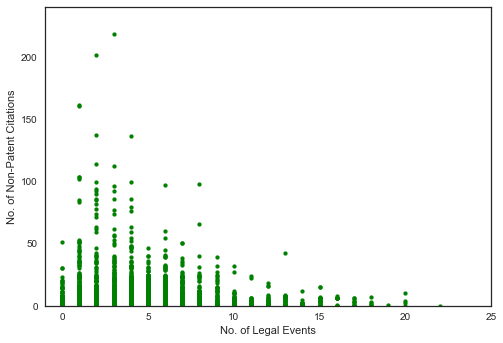

In [22]:
# Plot the number of non-patent citations vs. number of patent classifications.  

plt.scatter(num_les, num_npcs,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Legal Events")
plt.ylabel("No. of Non-Patent Citations")

plt.style.use('seaborn-white')
ax = plt.axes()
ax.set(xlim=(-1,25), ylim = (0,240))

plt.show()

## Plot the No. of inventors vs. other variables. 

### Plot the No. of inventors vs. No. of patent classifications. (num_inventor vs. num_class). 

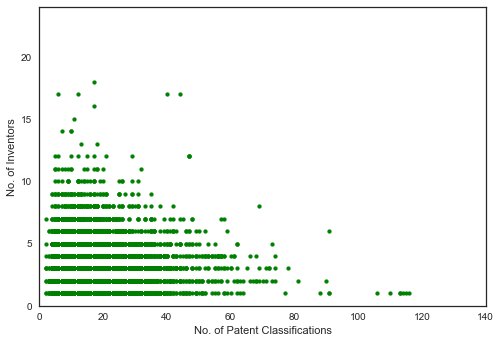

In [23]:
# Plot the No. of inventors vs. No. of patent classifications. 

plt.scatter(num_classes, num_inventors,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Patent Classifications")
plt.ylabel("No. of Inventors")

plt.style.use('seaborn-white')
ax = plt.axes()
ax.set(xlim=(0,140), ylim = (0,24))

plt.show()

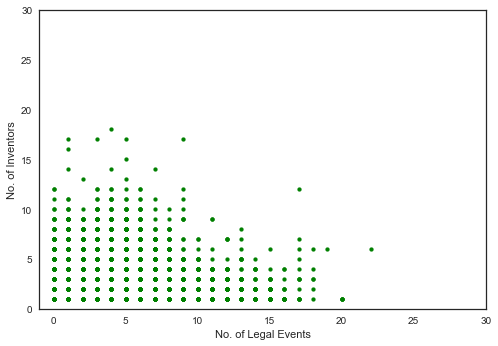

In [24]:
# Plot the No. of inventors vs. No. of legal events. 

plt.scatter(num_les, num_inventors,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Legal Events")
plt.ylabel("No. of Inventors")

plt.style.use('seaborn-white')
ax = plt.axes()
ax.set(xlim=(-1,30), ylim = (0,30))
plt.show()

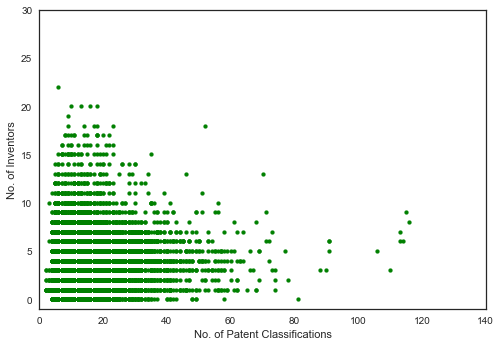

In [25]:
# Plot the No. of legal events vs. No. of patent classifications. 

plt.scatter(num_classes, num_les,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Patent Classifications")
plt.ylabel("No. of Inventors")

plt.style.use('seaborn-white')
ax = plt.axes()
ax.set(xlim=(0,140), ylim = (-1,30))

plt.show()

### Plot crosstab values. 

In [ ]:
pd.crosstab(df_patents["num_pc"],df_patents["num_rb"],margins=True)

In [ ]:
pd.crosstab(df_patents["num_npc"],df_patents["num_rb"],margins=True)

In [ ]:
pd.crosstab(df_patents["num_le"],df_patents["num_rb"],margins=True)

In [ ]:
pd.crosstab(df_patents["num_class"],df_patents["num_rb"],margins=True)

In [ ]:
pd.crosstab(df_patents["num_inventor"],df_patents["num_rb"],margins=True)

### Correlation plots. 

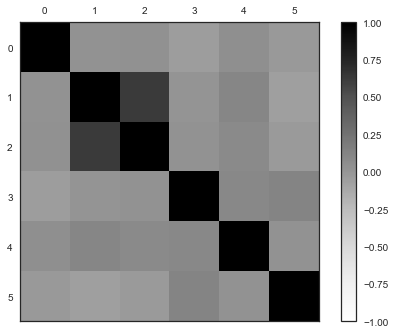

In [26]:
names = ['num_inventor', 'num_pc', 'num_npc', 'num_rb', 'num_class', 'num_le', 'cum_pc']

import seaborn as sns
correlations = df_patents.corr()

fig = plt.figure()
ax = fig.add_subplot(111) 
cax = ax.matshow(correlations, vmin= -1, vmax = 1)
fig.colorbar(cax)
plt.show()
 

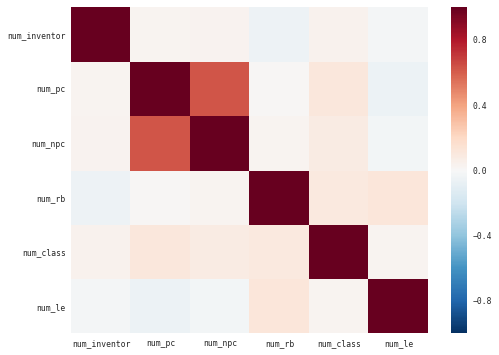

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")

# Load the datset of correlations.

corr = df_patents.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Calculate cumulative references. 

In [29]:
# Cumulative references are num_rb.  

cum_rb = 0

for row in df_patents.iterrows():
    df_patents['cum_rb'] = df_patents.num_rb.cumsum()

cum_rbs = []

value  = (df_patents['cum_rb'])
cum_rbs.append(value)
print value    

for row in df_patents.iterrows():      
    df_patents['cum_rb'] = value 


0             2
1             2
2            37
3            40
4            48
5            53
6            54
7            60
8            77
9            83
10           83
11          104
12          123
13          157
14          180
15          199
16          213
17          215
18          249
19          290
20          367
21          376
22          395
23          409
24          417
25          433
26          465
27          480
28          488
29          490
          ...  
10107    158614
10108    158614
10109    158614
10110    158614
10111    158614
10112    158614
10113    158614
10114    158614
10115    158614
10116    158614
10117    158614
10118    158614
10119    158614
10120    158614
10121    158614
10122    158614
10123    158614
10124    158614
10125    158614
10126    158614
10127    158614
10128    158614
10129    158614
10130    158614
10131    158614
10132    158614
10133    158614
10134    158614
10135    158614
10136    158614
Name: cum_rb, dtype: int

### No. of patent citations vs. Cumulative no. of forward citations. 

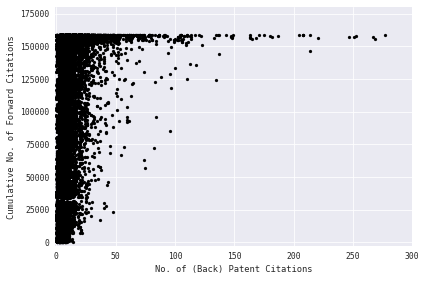

In [30]:
plt.scatter(num_pcs, cum_rbs, marker = 'o', color = 'black', s = 9 )
plt.xlabel("No. of (Back) Patent Citations")
plt.ylabel("Cumulative No. of Forward Citations")
plt.style.use('seaborn-white')
ax = plt.axes()
ax.set(xlim=(-1,300), ylim = (-3000,180000))
plt.show()

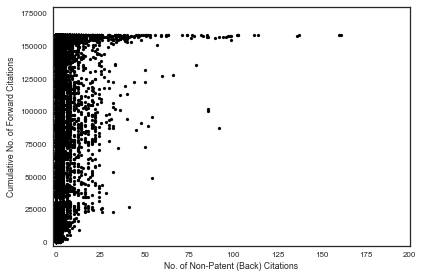

In [33]:
plt.scatter(num_npcs, cum_rbs, marker = 'o', color = 'black', s = 9 )
plt.xlabel("No. of Non-Patent (Back) Citations")
plt.ylabel("Cumulative No. of Forward Citations")
plt.style.use('seaborn-white')
ax = plt.axes()
ax.set(xlim=(-2,200), ylim = (-3000,180000))
plt.show()

## Plot time values of patent citations.  

In [34]:
timevalues = []

timevalue  = pd.to_datetime(df_patents['date'])
list (timevalue)
timevalues.append(list(timevalue))

for row in df_patents.iterrows():      
    df_patents['timevalue'] = timevalue


In [57]:
df_patents['timevalue'] = pd.to_datetime(df_patents['timevalue'])    
df_patents['time_delta'] = (df_patents['timevalue'] - df_patents['timevalue'].min())  / np.timedelta64(1,'D') - 2162

In [ ]:
#print (df_patents)

In [36]:
# Issue_dates is the string of data generated from converting 'date' into datetime format. 

from datetime import datetime

times = []

time1  = pd.to_datetime(df_patents['date'])
times.append(time1)

for row in df_patents.iterrows():      
    df_patents['times'] = time1


In [37]:
# Date is a string value in the dataframe. Turn 'Date' into timestamp and then into a list. 

tvalue  = pd.to_datetime(df_patents['date'])
list (tvalue)


[Timestamp('1976-01-06 00:00:00'),
 Timestamp('1976-01-06 00:00:00'),
 Timestamp('1976-01-06 00:00:00'),
 Timestamp('1976-01-06 00:00:00'),
 Timestamp('1976-01-06 00:00:00'),
 Timestamp('1976-01-06 00:00:00'),
 Timestamp('1976-01-06 00:00:00'),
 Timestamp('1976-01-06 00:00:00'),
 Timestamp('1976-01-06 00:00:00'),
 Timestamp('1976-01-20 00:00:00'),
 Timestamp('1976-01-20 00:00:00'),
 Timestamp('1976-01-20 00:00:00'),
 Timestamp('1976-01-20 00:00:00'),
 Timestamp('1976-01-20 00:00:00'),
 Timestamp('1976-01-20 00:00:00'),
 Timestamp('1976-01-27 00:00:00'),
 Timestamp('1976-01-27 00:00:00'),
 Timestamp('1976-01-27 00:00:00'),
 Timestamp('1976-02-03 00:00:00'),
 Timestamp('1976-02-03 00:00:00'),
 Timestamp('1976-02-03 00:00:00'),
 Timestamp('1976-02-03 00:00:00'),
 Timestamp('1976-02-10 00:00:00'),
 Timestamp('1976-02-10 00:00:00'),
 Timestamp('1976-02-17 00:00:00'),
 Timestamp('1976-02-24 00:00:00'),
 Timestamp('1976-02-24 00:00:00'),
 Timestamp('1976-02-24 00:00:00'),
 Timestamp('1976-03-

10137


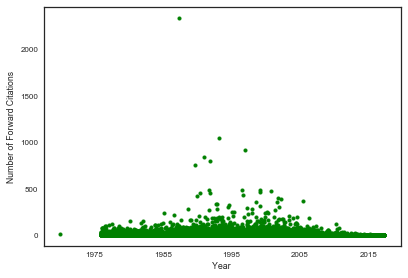

In [38]:
plt.scatter(list(tvalue), num_rbs, marker = 'o', s =14, c = 'green')
plt.xlabel("Year ")
plt.ylabel("Number of Forward Citations")

print len(list(tvalue))

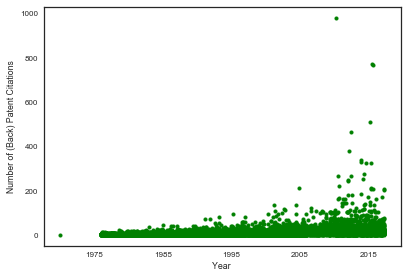

In [52]:
plt.scatter(list(tvalue), num_pcs, marker = 'o', s =14, c = 'green')
plt.xlabel("Year ")
plt.ylabel("Number of (Back) Patent Citations")


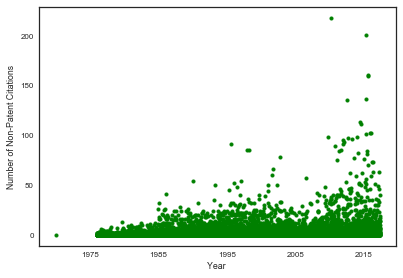

In [40]:
plt.scatter(list(tvalue), num_npcs, marker = 'o', s =14, c = 'green')
plt.xlabel("Year ")
plt.ylabel("Number of Non-Patent Citations")


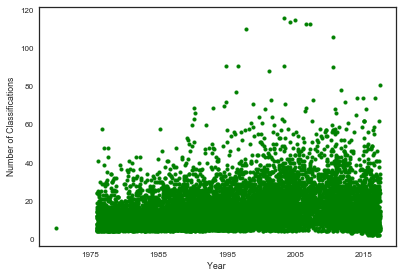

In [41]:
plt.scatter(list(tvalue), num_classes, marker = 'o', s =14, c = 'green')
plt.xlabel("Year ")
plt.ylabel("Number of Classifications")


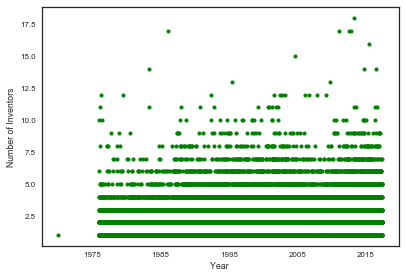

In [42]:
plt.scatter(list(tvalue), num_inventors, marker = 'o', s =14, c = 'green')
plt.xlabel("Year ")
plt.ylabel("Number of Inventors")


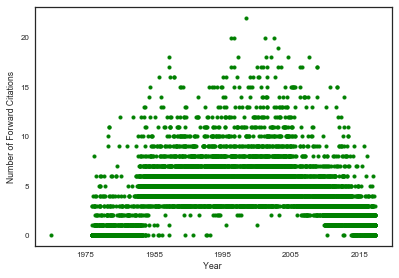

In [43]:
plt.scatter(list(tvalue), num_les, marker = 'o', s =14, c = 'green')
plt.xlabel("Year ")
plt.ylabel("Number of Forward Citations")


10137


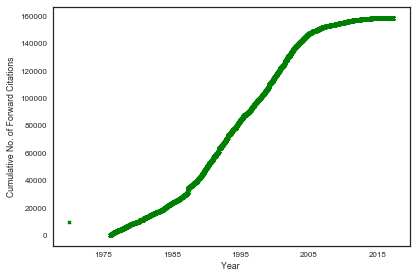

In [51]:
plt.scatter(list(tvalue), cum_rbs, marker = 'x', s =10, c = 'green')
plt.xlabel("Year ")
plt.ylabel("Cumulative No. of Forward Citations")

print len(list(tvalue))


### Calculate average citation rate per patent, ave_pcr. 

In [59]:
# Average citation rate is the number of citations per day.  June 30, 2017 = 15147 days. 

df_patents['ave_pcr'] = df_patents['num_rb']/(15147 - df_patents['time_delta'])

In [86]:
print (df_patents.tail(2000))

      patent_no                                       url  \
8137    7887584  https://www.google.com/patents/US7887584   
8138    7887747  https://www.google.com/patents/US7887747   
8139    7887975  https://www.google.com/patents/US7887975   
8140    7888263  https://www.google.com/patents/US7888263   
8141    7888742  https://www.google.com/patents/US7888742   
8142    7892365  https://www.google.com/patents/US7892365   
8143    7892366  https://www.google.com/patents/US7892366   
8144    7892482  https://www.google.com/patents/US7892482   
8145    7892650  https://www.google.com/patents/US7892650   
8146    7892653  https://www.google.com/patents/US7892653   
8147    7892678  https://www.google.com/patents/US7892678   
8148    7894165  https://www.google.com/patents/US7894165   
8149    7895836  https://www.google.com/patents/US7895836   
8150    7896222  https://www.google.com/patents/US7896222   
8151    7897132  https://www.google.com/patents/US7897132   
8152    7897266  https:/

In [63]:
    
# Add average patent citation rate to list.  
ave_pcrs = []

value  = (df_patents['ave_pcr'])
ave_pcrs.append(value)
#print value    


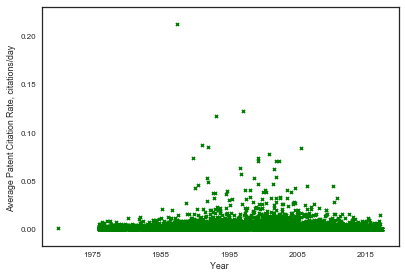

In [68]:
plt.scatter(list(tvalue), ave_pcrs, marker = 'x', s =10, c = 'green')
plt.xlabel("Year ")
plt.ylabel("Average Patent Citation Rate, citations/day ")
plt.show()


In [82]:
df_patents.describe()

,num_inventor,num_pc,num_npc,num_rb,num_class,num_le,cum_rb,time_delta,ave_pcr
count,10137.000000,10137.000000,10137.000000,10137.000000,10137.000000,10137.000000,10137.000000,10137.000000,10137.000000
mean,2.919108,12.997139,3.212785,15.647036,16.174213,4.176186,98076.576798,8289.609451,0.002201
std,1.818188,24.138194,8.621308,41.604616,10.058189,2.722414,54620.082613,4192.018375,0.005132
min,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,-2162.000000,0.000000
25%,2.000000,5.000000,0.000000,2.000000,9.000000,2.000000,45472.000000,4969.000000,0.000331
50%,3.000000,8.000000,0.000000,7.000000,14.000000,4.000000,108951.000000,8483.000000,0.001076
75%,4.000000,15.000000,3.000000,18.000000,20.000000,6.000000,153755.000000,11997.000000,0.002381
max,18.000000,981.000000,218.000000,2341.000000,116.000000,22.000000,158614.000000,15098.000000,0.213012
